<a href="https://colab.research.google.com/github/fariasBP/lab4Lmec311/blob/main/Lab4me.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LAB 4 - SOLUCION NUMERICA DE LA DESCARGA DE UN TANQUE
##CONCEPTOS PREVIOS
###Ecuación de Torricelli (para tanques abiertos):
Si el tanque está abierto a la atmósfera y el orificio de descarga es pequeño comparado con el nivel del fluido, la velocidad de salida ($v$) se aproxima por:
$$ v=\sqrt{2gh}=\frac{dh}{dt} $$
###Caudal de Descarga:
El caudal teorico ($Q_{teorico}$) se calcula como:
$$ Q=Av = A\sqrt{2gh} $$
En la práctica, el coeficiente de descarga ($c_d$ o simplemente $c$) ajusta el caudal real debido a pérdidas por viscosidad, contracción del flujo, etc.:
$$ Q_{real}=cQ{teorico} $$
($c$ suele determinarse experimentalmente y es $<1$).
$$ Q=A\frac{dh}{dt} = cA_0\sqrt{2gh} $$
##ECUACIÓN DE DESCARGA


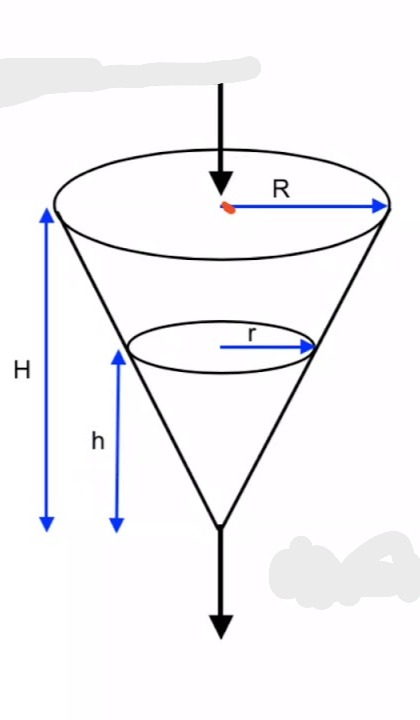

$$
Q=A\frac{dh}{dt}=c_dA_0\sqrt{2gh} \\
A_0=\pi (\frac{d_0}{2})^2 \ \text{(para orificio de salida)} \\
A(h)=\pi (r(h))^2
$$
con propiedades trigonometricas:
$$
R^2=r^2+(R-h)^2 \\
R^2=r^2+R^2-2Rh+h^2 \\
r^2=2Rh-h^2=(r(h))^2
$$
entonces:
$$
A(h)=\pi(2Rh-h^2) \\
\frac{dh}{dt}=\frac{c_dA_0\sqrt{2gh}}{\pi(2Rh-h^2)}
$$
debido a que h disminuye al vaciarse, finalmente se obtiene:
$$ \frac{dh}{dt}=-\frac{c_dA_0\sqrt{2gh}}{\pi(2Rh-h^2)}  $$
donde: \\
$ \frac{dh}{dt} $: Representa la tasa de cambio del nivel del líquido ($h$) respecto al tiempo ($t$). \\
$ c_d $: Coeficiente de descarga (adimensional, típicamente entre 0.6 y 0.8 para orificios pequeños). \\
$ A_0 $: Área del orificio de salida ($A_0=\pi r_0^2$). \\
$ \sqrt{2gh} $: Velocidad de Torricelli, típica en descarga por gravedad (suponiendo flujo ideal sin fricción). \\
$ \pi(2Rh-h^2) $: Área transversal del tanque a una altura $h$ (esta area es para un tanque esferico, si la fuera para un tanque entonces $A=\pi R^2$).

##SOLUCIÓN NUMÉRICA
La ecuación vista es una ecuación diferencial que al resolverla obtendremos una funcion $h(t)$.
El método que usaremos para resolver es Runge-Kutta de cuarto order (RK7). \\
Sea la ecuacion diferencial $y'=f(x,y)$, entonces
$$
x_{i+1}=x_i-\frac{1}{6}(k_1+2k_2+2k_3+k_4) \\
k_1=hf(x_i,y_i) \\
k_2=hf(x_i+\frac{1}{2}h,y_i+\frac{1}{2}k_1) \\
k_3=hf(x_i+\frac{1}{2}h,y_i+\frac{1}{2}k_2) \\
k_4=hf(x_i+h,y_i+k_3)
$$


Empezamos con la funcion:
$$
h'=-\frac{c_dA_0\sqrt{2gh}}{\pi(2Rh-h^2)} \\
⟹ f(x,y)=-\frac{c_dA_0\sqrt{2gy}}{\pi(2Ry-y^2)}
$$
donde $y=h$ y $x=t$, ademas de los datos:
$$
\text{Radio de la esféra} \ (R)=1[m] \\
\text{Diametro del orificio de salida} \ (d)=0.05[m] \\
\text{Salto} \ (step)=0.8 \\
\text{Coeficiente de descarga} \ (c)=0.6 \\
\text{Gravedad} \ (g)=9.81 [m/s^2] \\
\text{Altura} \ (H)=2.75 [m]
$$
Sin embargo se puede tomar otros valores a continuación:

In [8]:
logico=True #@param {type:"boolean"}

R=2 #@param {type:"number"}
d=0.05 #@param {type:"number"}
step=0.8 #@param {type:"number"}
c=0.55 #@param {type:"number"}
g=9.81 #@param {type:"number"}
H=2.75 #@param {type:"number"}
t0 = 0
tf = 100

importamos las librerias necesarias y definimos constantes restantes

In [9]:
import numpy as np
import matplotlib.pyplot as plt

A0 = np.pi*(d/2)**2

Note que nuestro f(x,y) solo depede de y entonces:
$$ f(y)=-\frac{c_dA_0\sqrt{2gy}}{\pi(2Ry-y^2)} $$
por lo tanto nuestras ecuaciones de $k_1$, $k_2$, $k_3$ y $k_4$, seran de la siguiente manera:
$$
k_1=hf(y_i) \\
k_2=hf(y_i+\frac{1}{2}k_1) \\
k_3=hf(y_i+\frac{1}{2}k_2) \\
k_4=hf(y_i+k_3)
$$
entonces creamos nuestra funcion $f(y)$:

In [10]:
def f(x, y):
  return - c * A0 * np.sqrt(2 * g * y) / (np.pi * (2 * R * y - y**2))

Creamos una funcion de Runge Kutta, donde para nuestro caso sera x0=t0, xf=tf, y0=H y h=step

In [11]:
def runge_kutta(x0, y0, xf, h):
    n = int((xf - x0)/step)
    # x2 = np.arange(x0, xf + h, h)
    x = np.linspace(x0, xf, n+1)
    # y2 = np.zeros(len(x))
    y = np.zeros(n+1)
    y[0] = y0
    for i in range(n):
        k1 = h*f(x[i], y[i])
        k2 = h*f(x[i] + h/2, y[i] + 1/2 * k1)
        k3 = h*f(x[i] + h/2, y[i] + 1/2 * k2)
        k4 = h*f(x[i] + h, y[i] + k3)
        y[i+1] = y[i] + (1/6) * (k1 + 2*k2 + 2*k3 + k4)
    return x, y

finalmente resolvemos y obtenemos pares ordenados de la forma:
$$ \{(x_0,y_0), (x_1,y_1), (x_2,y_2), ... (x_n,y_n)\} $$

In [12]:
t, h = runge_kutta(t0, H, tf, step)

Por ultimo graficamos con los pares ordenados t, h:

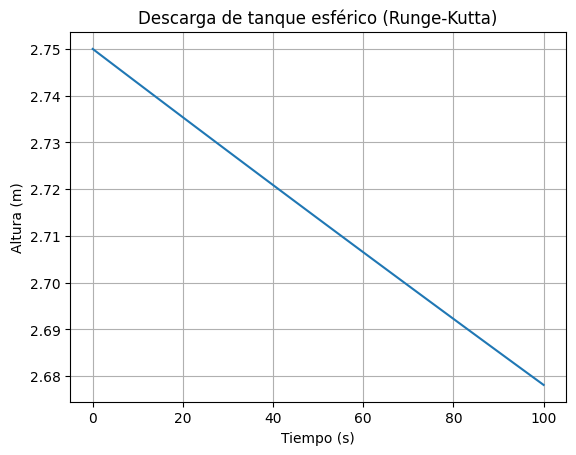

In [13]:
plt.plot(t, h)
plt.xlabel('Tiempo (s)')
plt.ylabel('Altura (m)')
plt.title('Descarga de tanque esférico (Runge-Kutta)')
plt.grid()
plt.show()

Por ultimo graficamos